### Clasificación desgaste de materiales

##### Fabio Martínez
##### Camilo Gonzalez
##### Cristian Viafara

##### Universidad Industrial de Santander

Primero: leer los datos de severo y moderado ubicados en dos diferentes carpetas. 

In [3]:
import numpy as np
import os
import sys
import tarfile
from skimage import io
import matplotlib.pyplot as plt

path_moderado = '/home/fmartinezc/main/datasets/2018-Classified-images-wear-wom/SEVERO/'
path_severo = '/home/fmartinezc/main/datasets/2018-Classified-images-wear-wom/MODERADO/'
images_moderado = os.listdir(path_moderado)
images_severo = os.listdir(path_severo)

print(len(images_severo))
print(len(images_moderado))
print(images_severo)

21
29
['13CrWCI-GLASS8.TIF', 'AustWCI-GLASS1.TIF', 'AustWCI-GLASS6.TIF', '13CrWCI-GLASS7.TIF', 'AustWCI-GLASS3.TIF', '13CrWCI-GLASS4.TIF', '24CrWCI-GARNET2.TIF', 'AustWCI-GLASS2.TIF', '13CrWCI-GLASS2.TIF', 'AustWCI-GLASS7.TIF', '24CrWCI-GARNET3.TIF', '13CrWCI-GLASS5.TIF', 'AustWCI-GLASS4.TIF', '13CrWCI-GLASS3.TIF', '24CrWCI-GARNET1.TIF', '13CrWCI-GLASS1.TIF', 'AustWCI-GLASS5.TIF', '13CrWCI-GLASS6.TIF', '24CrWCI-GARNET4.TIF', '24CrWCI-GARNET5.TIF', '13CrWCI-GLASS9.TIF']


### Algunos ejemplos visuales



In [4]:
import numpy as np
import random
def disp_samples_fmc(data_folders, sample_size):
    from skimage import io
    image_files = os.listdir(data_folders)
    image_sample = random.sample(image_files, sample_size)
    fig = plt.figure(figsize=(70,100))
    for i in range(len(image_sample)):
        ax=fig.add_subplot(5, 10, i+1)
        #print(image_sample[i])
        image_file = os.path.join(data_folders, image_sample[i])
        img = io.imread(image_file)
        plt.imshow(img,  cmap = plt.cm.Greys_r)


        

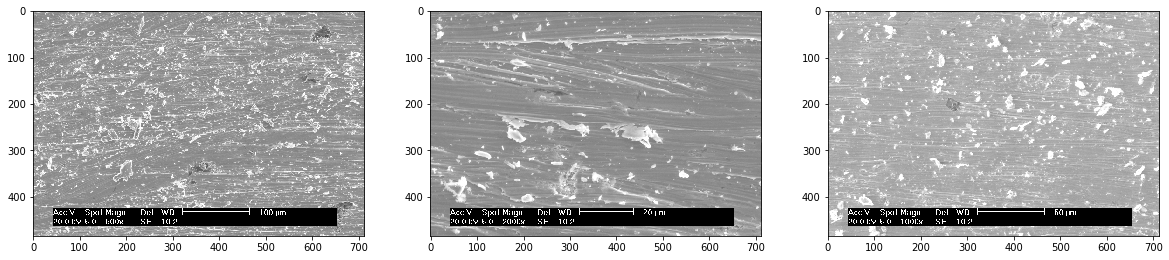

In [5]:
disp_samples_fmc(path_moderado,3)

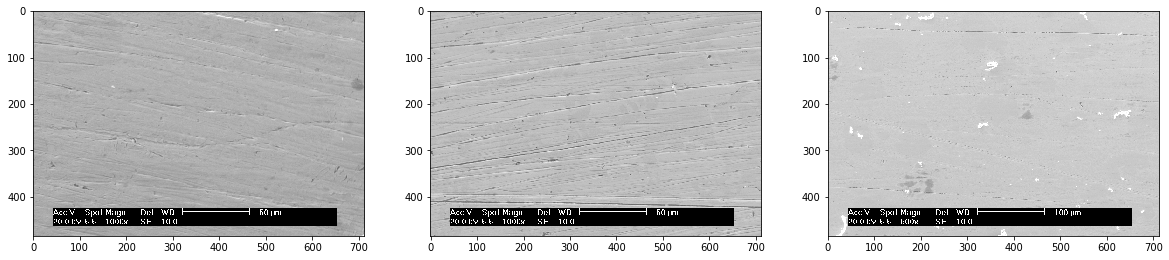

In [6]:
disp_samples_fmc(path_severo,3)

#  Cálculo del descriptor de HOG y etiquetas

In [8]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage.feature import hog
%matplotlib inline


X=[] # descriptor


#moderado
for image_path in images_moderado:
    image_file = os.path.join(path_moderado, image_path)
    image = color.rgb2gray(io.imread(image_file))
    fd = hog(image, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1))
    X.append(fd)
    #X = np.vstack(X,fd) 


#severo
for image_path in images_severo:
    image_file = os.path.join(path_severo, image_path)
    image = color.rgb2gray(io.imread(image_file))
    fd = hog(image, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1))
    X.append(fd)
    
X = np.r_[X]
y=[]

lab_mod = np.zeros(len(images_moderado)).astype(int).transpose()
lab_sev = np.ones(len(images_severo)).astype(int).transpose()
y = np.concatenate( (lab_mod, lab_sev), axis=0)
y = np.r_[y]
print("X.shape: ", X.shape, " y.shape: ", y.shape)
print(type(X))

/usr/local/lib/python3.5/dist-packages/skimage/feature/_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


X.shape:  (50, 10560)  y.shape:  (50,)
<class 'numpy.ndarray'>


In [9]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage import color
from skimage.feature import hog
%matplotlib inline

def disp_samples_fmc(data_folders, sample_size):
    from skimage import io
    for folder in data_folders:
        #print(folder)
        image_files = os.listdir(folder)
        image_sample = random.sample(image_files, sample_size)
        fig = plt.figure(figsize=(10,6))
        for i in range(len(image_sample)):
            ax=fig.add_subplot(5, 10, i+1)
            #print(image_sample[i])
            image_file = os.path.join(folder, image_sample[i])
            img = io.imread(image_file)
            plt.imshow(img,  cmap = plt.cm.Greys_r)

###### Datos en memoria y archivos de texto
se guarda en dos diferentes vectores. Los datos son escritos en un archivo de texto y también pueden estar disponibles en RAM

## Metodos de aprendizaje

#### Test inicial

In [10]:

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

estimator_GNB = GaussianNB()
estimator_DTR =DecisionTreeClassifier()
estimator_SVC = SVC()
estimator_RFC =RandomForestClassifier()

estimator_GNB.fit(X,y)
estimator_DTR.fit(X,y)
estimator_SVC.fit(X,y)
estimator_RFC.fit(X,y)



predictions_GNB = estimator_GNB.predict(X)
predictions_DTR = estimator_DTR.predict(X)
predictions_SVC = estimator_SVC.predict(X)
predictions_RFC = estimator_RFC.predict(X)

In [12]:
from sklearn.metrics import *
print("predictions_GNB %.3f"%accuracy_score(predictions_GNB, y))
print("predictions_DTR %.3f"%accuracy_score(predictions_DTR, y))
print("predictions_SVC %.3f"%accuracy_score(predictions_SVC, y))
print("predictions_RFC %.3f"%accuracy_score(predictions_RFC, y))



predictions_GNB 0.980
predictions_DTR 1.000
predictions_SVC 0.580
predictions_RFC 1.000



## By using cross validations score 

In [13]:
from sklearn.model_selection import KFold

s_GNB = cross_val_score(estimator_GNB, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print(s_GNB)
print("accuracy s_GNB %.3f (+/- %.5f)"%(np.mean(s_GNB), np.std(s_GNB)))

s_DTR = cross_val_score(estimator_DTR, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print(s_DTR)
print("accuracy s_DTR %.3f (+/- %.5f)"%(np.mean(s_DTR), np.std(s_DTR)))

s_SVC = cross_val_score(estimator_SVC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print(s_SVC)
print("accuracy s_SVC %.3f (+/- %.5f)"%(np.mean(s_SVC), np.std(s_SVC)))

s_RFC = cross_val_score(estimator_RFC, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print(s_RFC)
print("accuracy s_RFC %.3f (+/- %.5f)"%(np.mean(s_RFC), np.std(s_RFC)))


[1.  0.6 0.6 1.  1.  1.  1.  0.8 0.6 0.8]
accuracy s_GNB 0.840 (+/- 0.17436)
[0.8 0.4 0.4 0.6 0.6 1.  0.8 1.  0.8 1. ]
accuracy s_DTR 0.740 (+/- 0.22000)
[0.8 0.6 0.4 0.8 0.4 0.6 0.6 0.4 0.6 0.6]
accuracy s_SVC 0.580 (+/- 0.14000)
[0.8 0.8 0.6 0.6 0.8 1.  1.  1.  1.  0.8]
accuracy s_RFC 0.840 (+/- 0.14967)


In [15]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,20)
    for nfolds in nfolds_range:
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(accuracy_score))
        print(nfolds, np.mean(s), np.std(s),)
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

2 0.74 0.14
3 0.8419117647058824 0.13779001082042042
4 0.8413461538461539 0.05234770183032393
5 0.7200000000000001 0.1469693845669907
6 0.798611111111111 0.09377143102096802
7 0.8163265306122448 0.18253616142855428
8 0.8035714285714286 0.22548448720090253
9 0.7962962962962963 0.10592851589685255
10 0.8400000000000001 0.19595917942265423
11 0.7954545454545454 0.1912334906178421
12 0.7374999999999999 0.15017351075783417
13 0.7628205128205128 0.31832587225474707
14 0.8273809523809523 0.2662651100755362
15 0.7555555555555554 0.21401511426953582
16 0.84375 0.15831962659969442
17 0.8039215686274509 0.2571544519334118
18 0.8796296296296295 0.20642126675562922
19 0.8157894736842105 0.20869082900649685


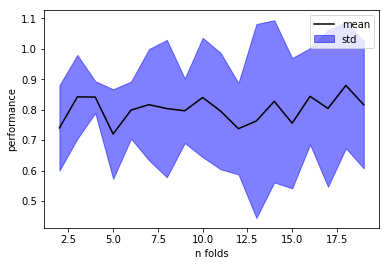

In [16]:
show_curve(RandomForestClassifier())